# Comparando reducciones

En esta notebook vamos a comparar las reducciones que obtenemos sobre un mismo set de datos aplicando las distintas técnicas vistas en la teórica.
Para eso, como siempre, comenzamos importando las librerias necesarias

In [1]:
%matplotlib notebook
# librerias par graficar
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D

Axes3D

# ----------------------------------------------------------------------
# Dataset

from sklearn import manifold, datasets


# Reducciones

from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE


El dataset sobre el que trabajaremos se llama <i>Swiss Roll</i>, el mismo esta generado sintéticamente, es decir, no esta extraído de un caso real. Es un manifold de datos tridimensionales con forma de "rollo" o roll. El objetivo será en todos los casos reducirlo a 2 dimensiones.

A continuación mediante la librería datasets de sklearn lo creamos y graficamos para verlo en detalle.

<IPython.core.display.Javascript object>


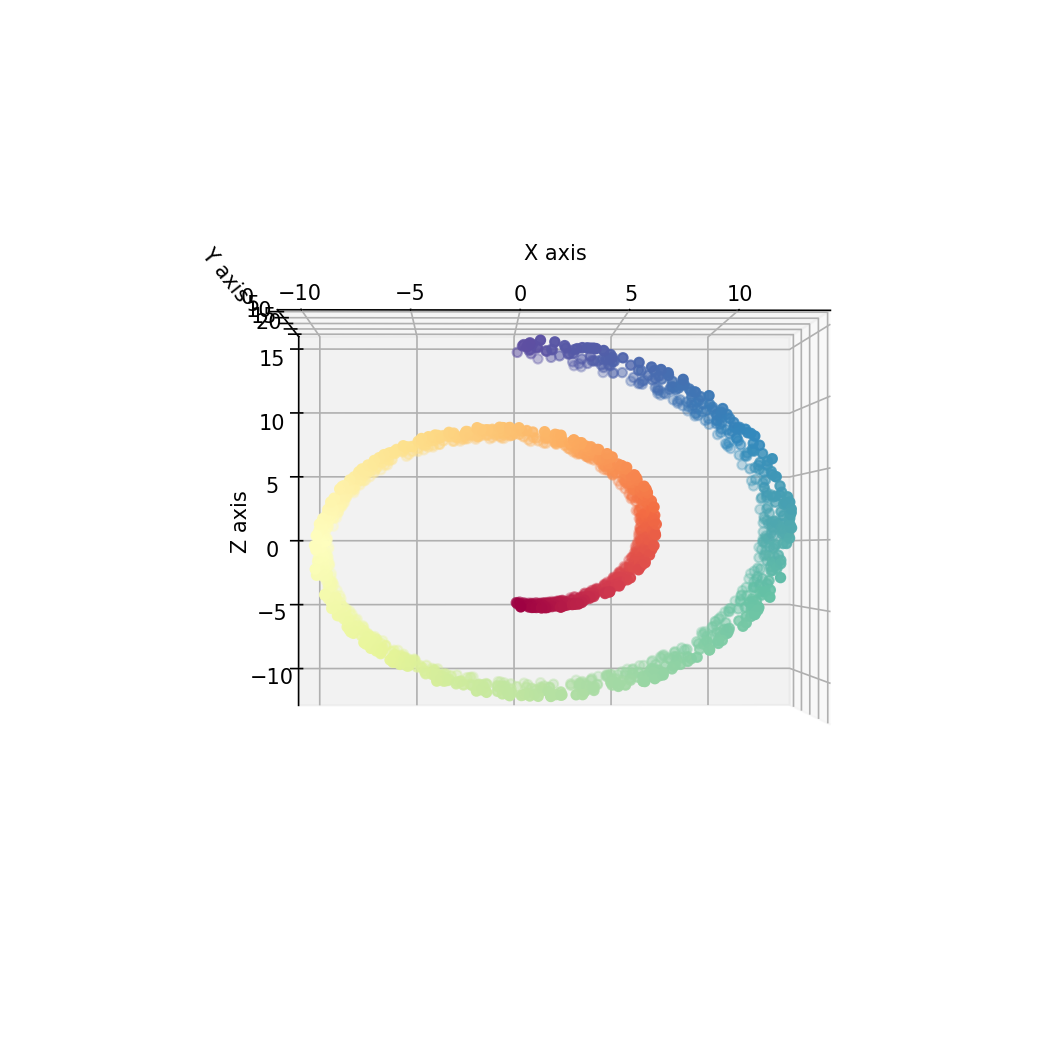

In [2]:
X, color = datasets.make_swiss_roll(n_samples=1500)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection='3d')


ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, marker='o', cmap=plt.cm.Spectral)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

for i in range(0, 360, 45):
    ax.view_init(None, i)
    plt.show()


## PCA
La primera transformación que le aplicaremos será PCA, calcularemos sus componente princpales y proyectaremos los datos sobre los 2 principales

In [3]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

Veamos cuanta varianza explica cada componente

In [4]:
pca.explained_variance_ratio_

array([0.39873701, 0.32699596])

Entre ambas componentes conservo un 72% de la varianza.

Ahora graficaremos la reducción en las dos dimensiones obtenicas

<IPython.core.display.Javascript object>


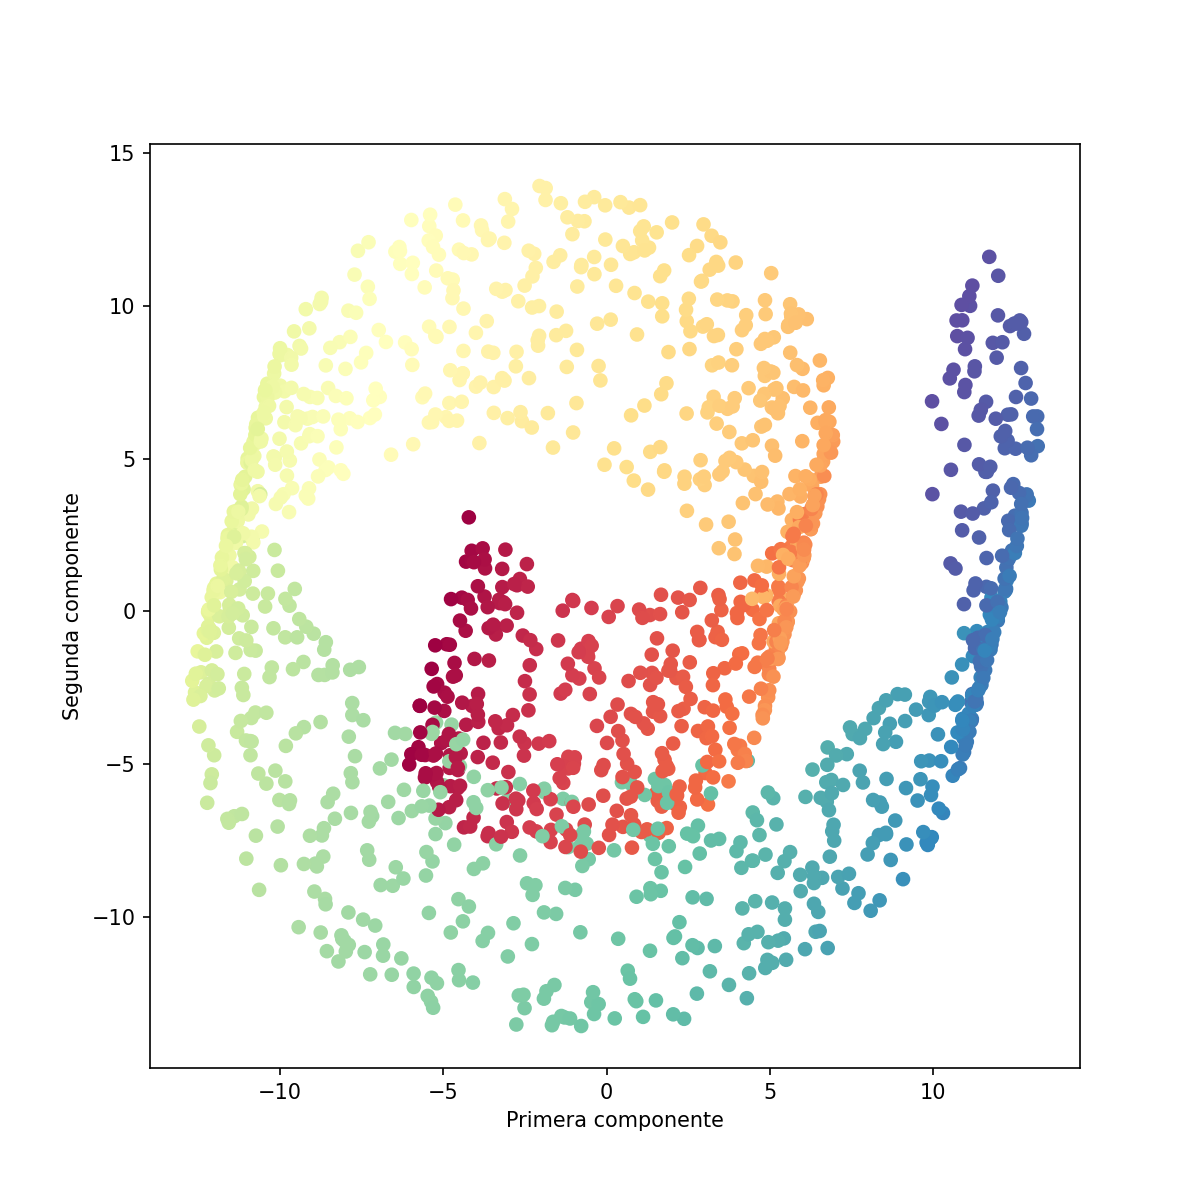

In [5]:
fig1 = plt.figure(figsize=(8, 8), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
ax.set_xlabel('Primera componente')
ax.set_ylabel('Segunda componente')
plt.scatter(
    principalComponents[:, 0],
    principalComponents[:, 1],
    c=color,
    marker='o',
    cmap=plt.cm.Spectral,
)


plt.show()

Parece ser una buena representación en 2D de nuestro Swiss ROll, no?

Veamos ahora como quedan con MDS

## MDS

Al igual que el caso anterior lo primero que hacemos es transformar el manifold mediante MDS a 2 dimensiones.

Skelarn nos provee interfaces sumamentes similares para todos estos métodos, por eso podemos ver que las instrucciones a correr son casi las mismas

In [6]:
embedding = MDS(n_components=2)
mds_transformation = embedding.fit_transform(X)

Podemos ver que el tiempo computacional ya no es el mismo. Mientras que calcular PCA fue casi instantaneo esta vez nos demoró unos segundos. Eso es debido principalmente al proceso iterativo que requiere MDS.

Ahora, al igual que con PCA, grafiquemos la reducción obtenida

<IPython.core.display.Javascript object>


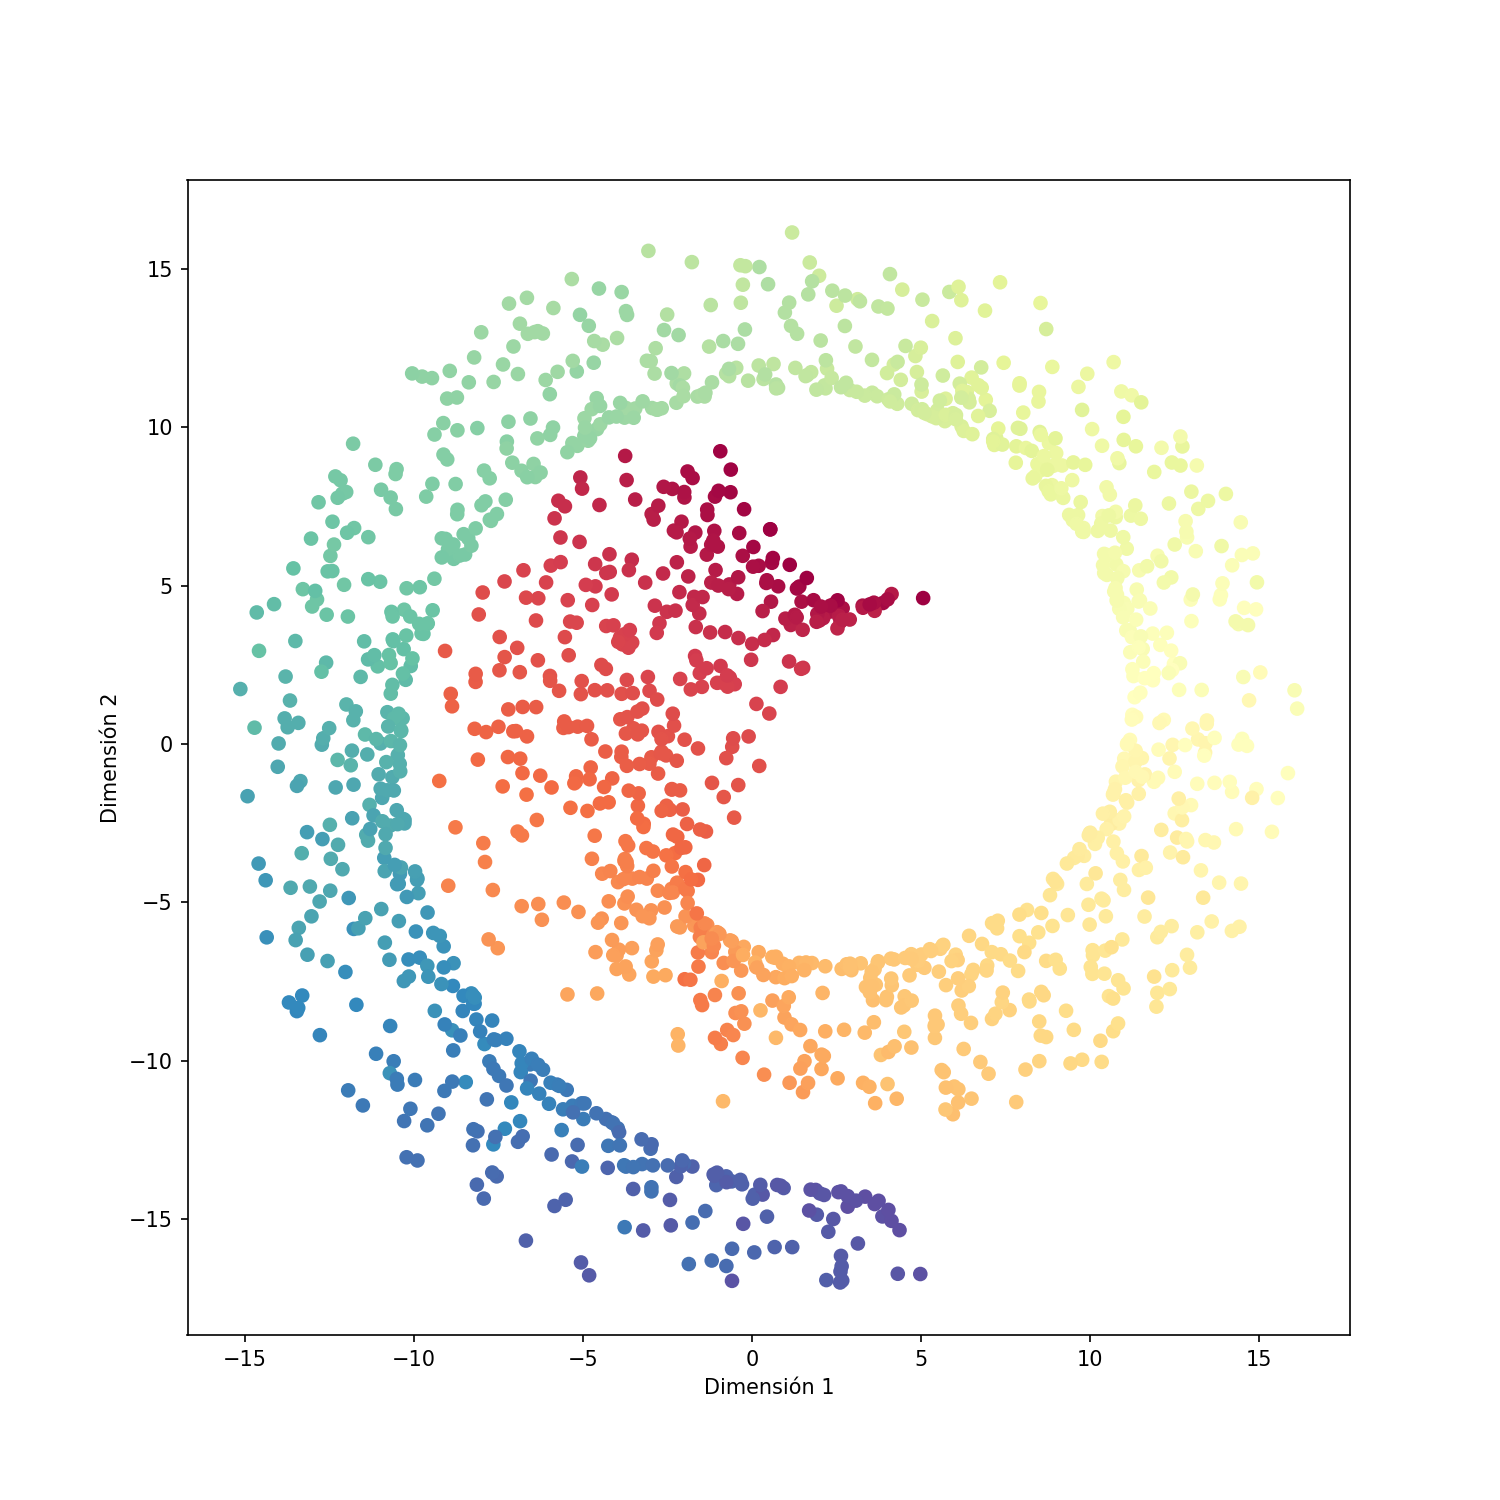

In [7]:
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
plt.scatter(
    mds_transformation[:, 0],
    mds_transformation[:, 1],
    c=color,
    marker='o',
    cmap=plt.cm.Spectral,
)

plt.show()

Podemos ver que ahora la reducción es distinta a la de PCA. Si bien sigue viendose un Roll, esta vez podemos apreciar el "ancho" del mismo

Veamos ahora que sucede con ISOMAP

## ISOMAP

Para ISOMAP va a ser necesario definir el hiper-parámetro <i>n_neighbors</i> que indica la cantidad de vecinos a observar a la hora de construir el grafo. De este valor dependerá en gran parte la proyección resultante.

In [8]:

iso = Isomap(n_neighbors=15, n_components=2)
iso.fit(X)
manifold_2Da = iso.transform(X)

<IPython.core.display.Javascript object>


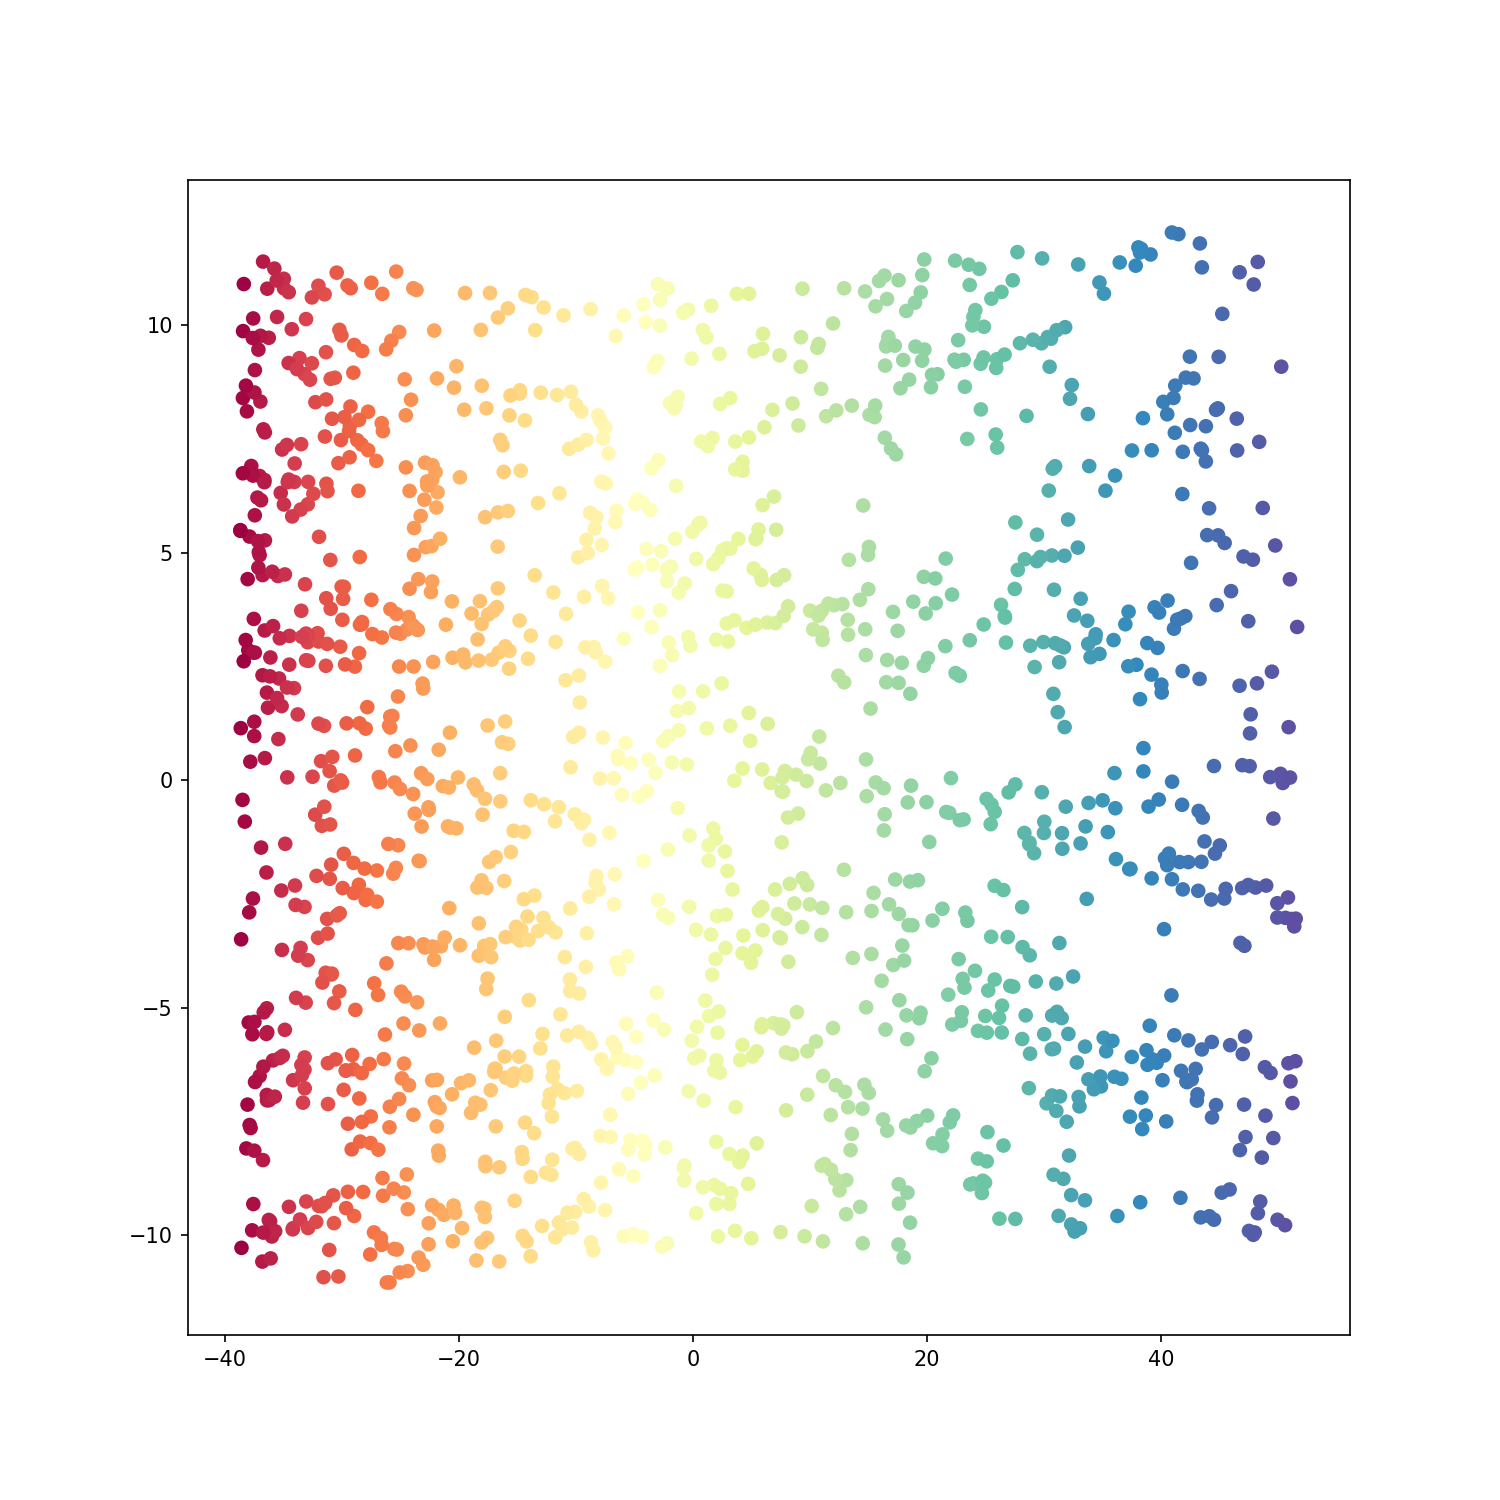

In [9]:
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(
    manifold_2Da[:, 0], manifold_2Da[:, 1], c=color, marker='o', cmap=plt.cm.Spectral
)
# plt.scatter(principalComponents[df_train['Survived']==0,0], principalComponents[df_train['Survived']==0,1], color='r', s=10)

plt.show()

Veamos ahora que sucede para un valor menor de cantidad de vecinos a observar

<IPython.core.display.Javascript object>


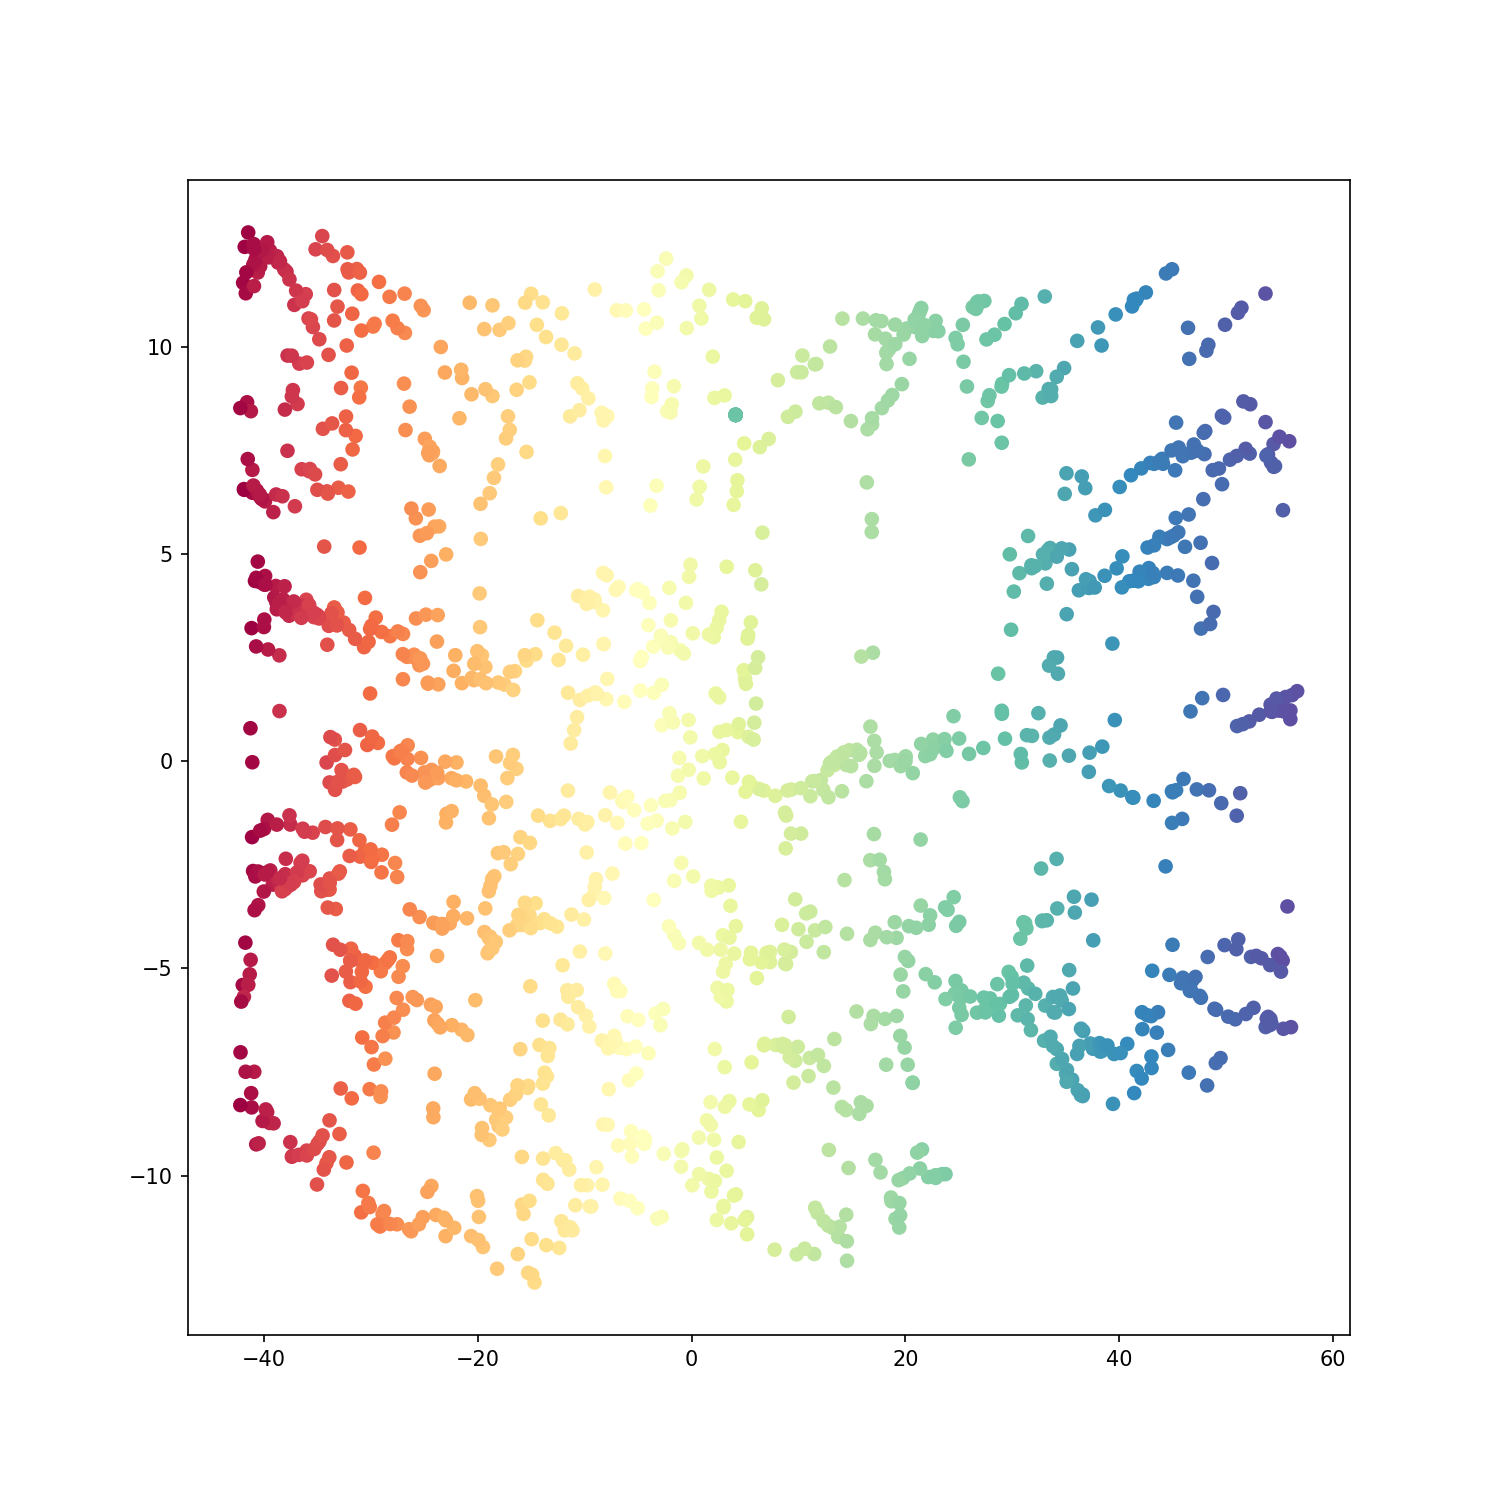

In [10]:

iso = Isomap(n_neighbors=5, n_components=2)
iso.fit(X)
manifold_2Da = iso.transform(X)
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(
    manifold_2Da[:, 0], manifold_2Da[:, 1], c=color, marker='o', cmap=plt.cm.Spectral
)
# plt.scatter(principalComponents[df_train['Survived']==0,0], principalComponents[df_train['Survived']==0,1], color='r', s=10)

plt.show()

Podemos verque los datos obtenidos son bastante parecidos aunque mas "esparsos", eso es debido a que el grafo esta menos contactado y por lo tanto algunas distancias se agrandan.

Ahora... que sucederá si en utilizamos una cantidad de vecinos bastante mas grande??

<IPython.core.display.Javascript object>


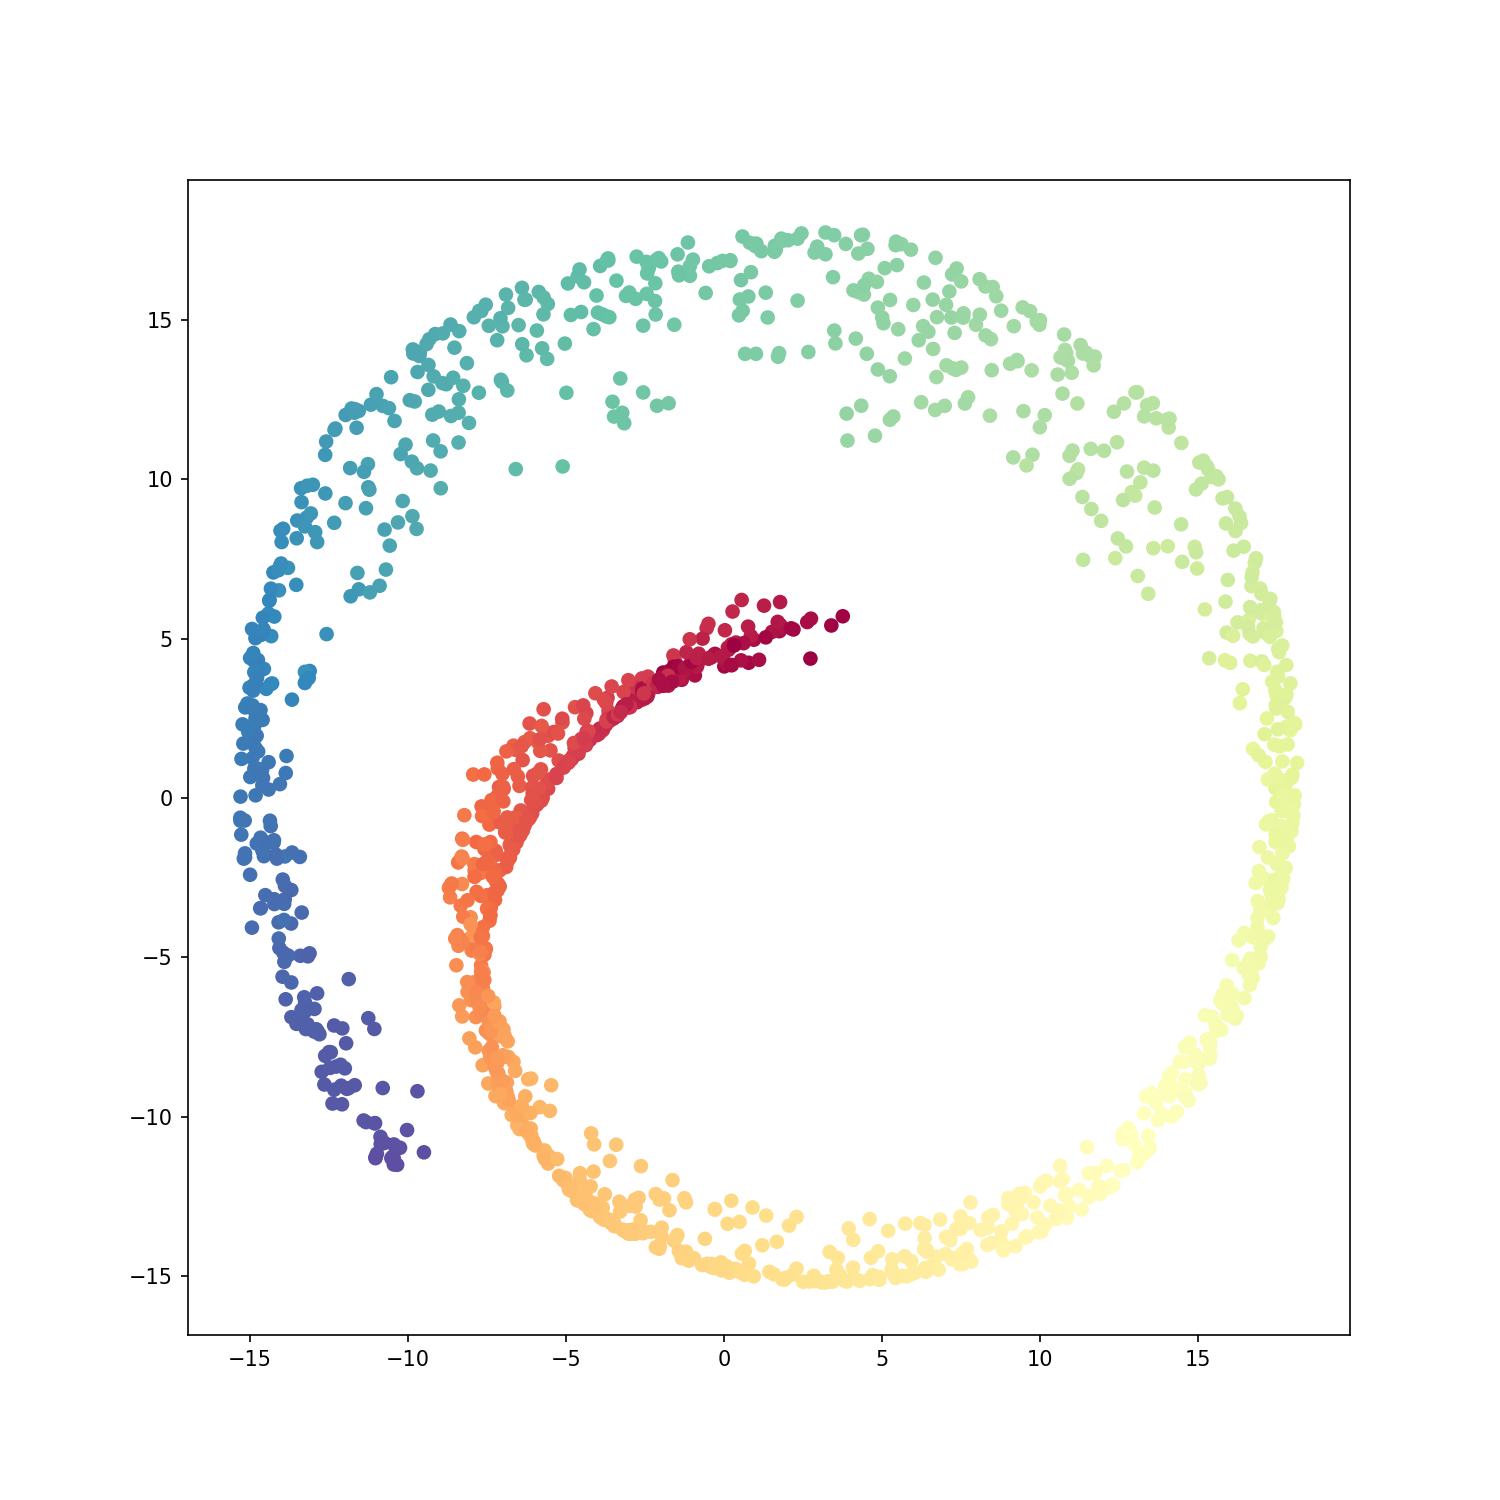

In [11]:

iso = Isomap(n_neighbors=45, n_components=2)
iso.fit(X)
manifold_2Da = iso.transform(X)
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(
    manifold_2Da[:, 0], manifold_2Da[:, 1], c=color, marker='o', cmap=plt.cm.Spectral
)
# plt.scatter(principalComponents[df_train['Survived']==0,0], principalComponents[df_train['Survived']==0,1], color='r', s=10)

plt.show()

La reducción se parece mucho mas a las de las otras técnicas!

Pero, ¿porqué es esto?

Al incrementar demasiado la cantidad de vecinos a observar se pierda la noción de distancia geodésica, ya que muchos nodos pasan a tener vecinos a los que llegan saliendose del manifold.


Finalmente aplicamos el método de reducción de dimensionalidad TSNE. Para este método los parámetros más importantes son el número de componentes o *n_components*, el cual setearemos en 2 ya que queremos un gráfico 2D, y *perplexity*, que esta relacionado con el número de vecinos considerados.  Generalmente este último parámetros se tunea para lograr una topología plausible.

<IPython.core.display.Javascript object>


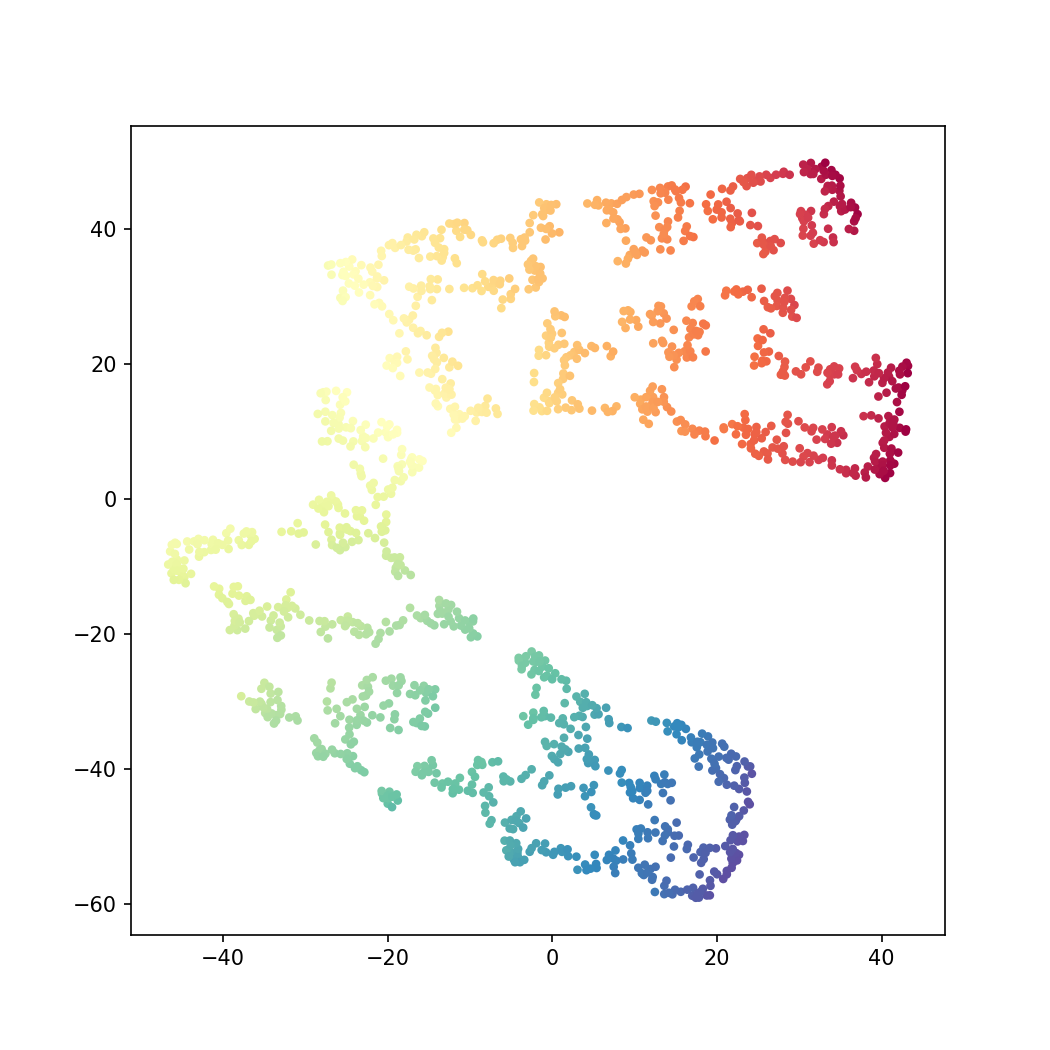

In [12]:
X_tsne = TSNE(n_components=2, perplexity=25).fit_transform(X)
fig1 = plt.figure(figsize=(7, 7), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, marker='o', s=10, cmap=plt.cm.Spectral)

plt.show()

Se observa un desdoblamiento del *roll*. Variamos ahora *perplexity* a un menor valor.

<IPython.core.display.Javascript object>


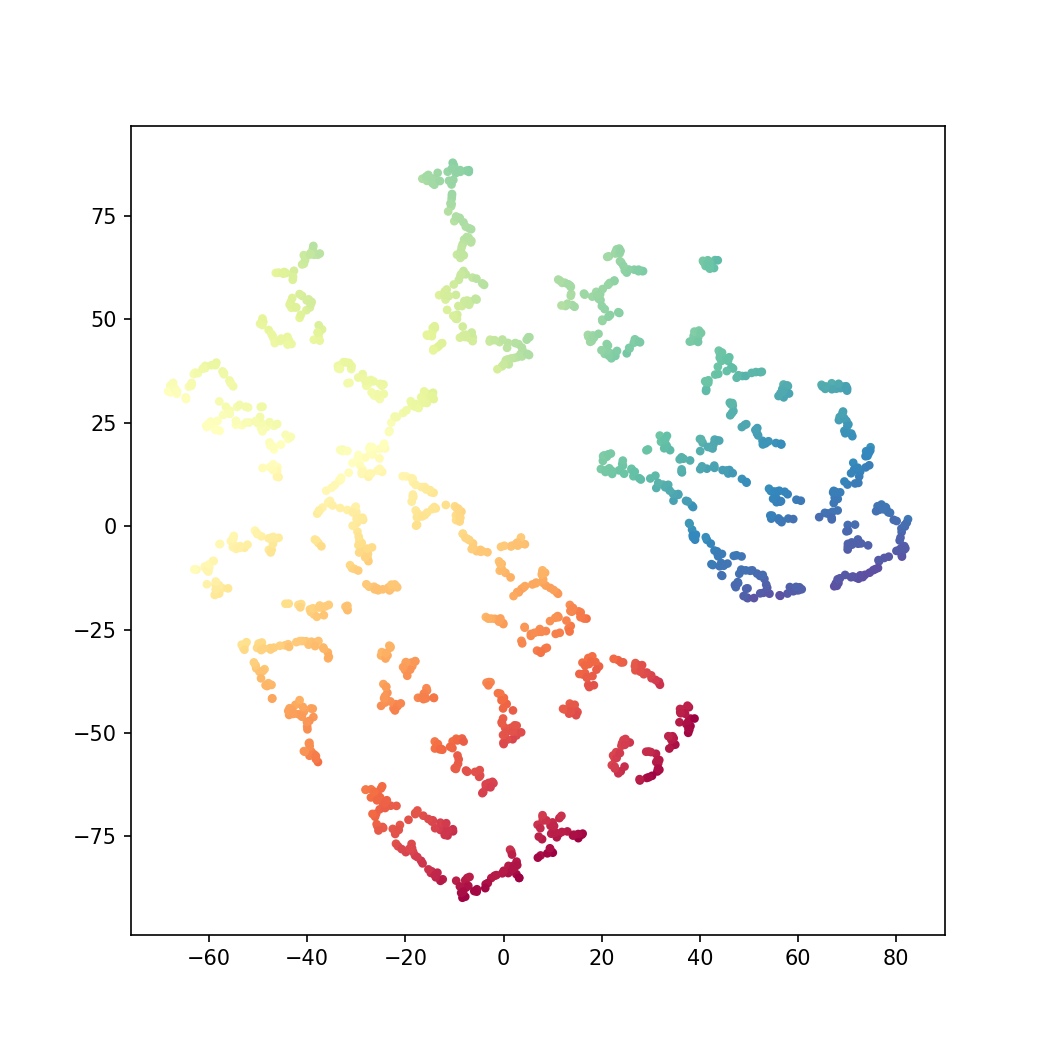

In [13]:
X_tsne = TSNE(n_components=2, perplexity=10).fit_transform(X)
fig1 = plt.figure(figsize=(7, 7), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, marker='o', s=10, cmap=plt.cm.Spectral)

plt.show()

Se observa que ahora los puntos dentro de los conglomerados se encuentran más juntos pero los conglomerados entre sí se encuentran más separados. Ahora aumentamos la *perplexity*.

<IPython.core.display.Javascript object>


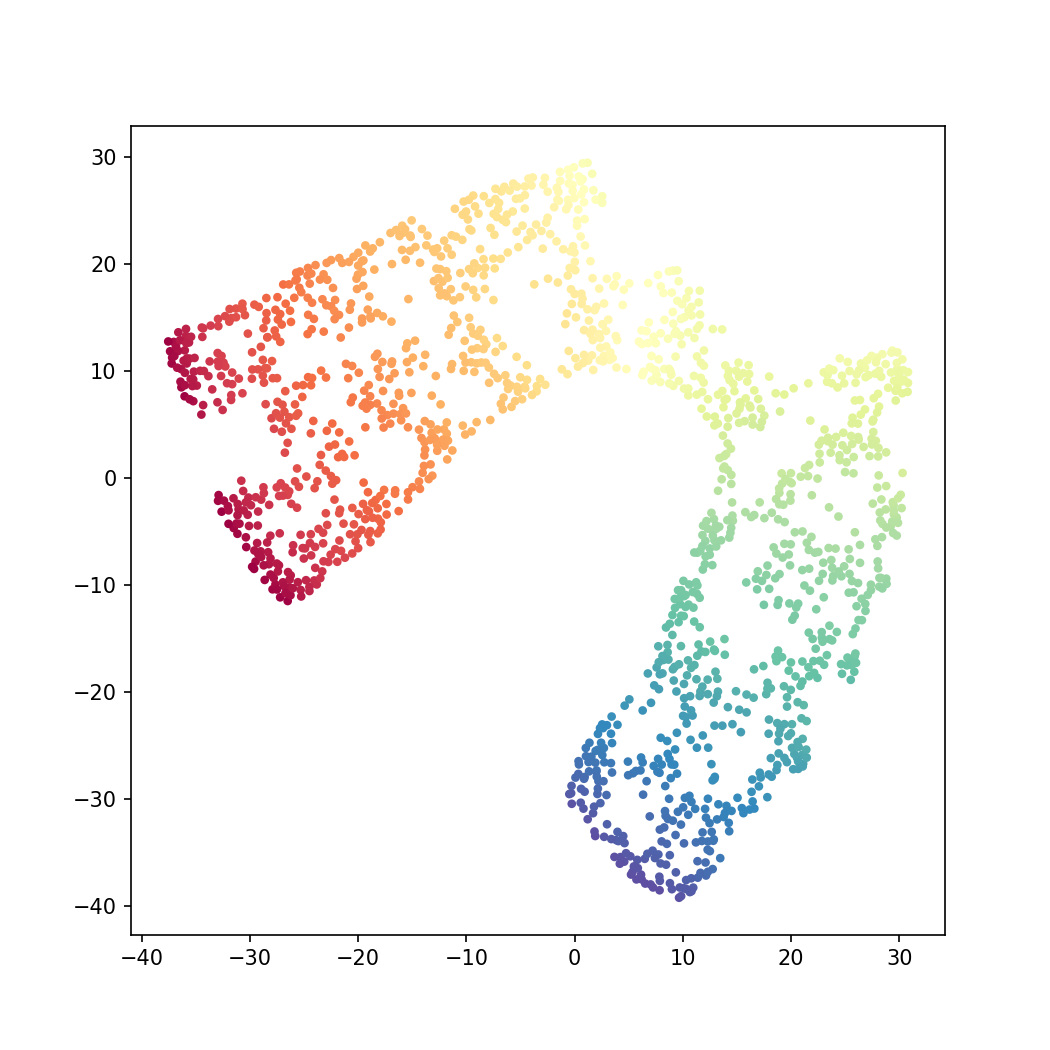

In [14]:
X_tsne = TSNE(n_components=2, perplexity=50).fit_transform(X)
fig1 = plt.figure(figsize=(7, 7), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, marker='o', s=10, cmap=plt.cm.Spectral)

plt.show()

Se observa que los conglomerados tienen mayor cantidad de puntos y los conglomerados estás más cercanos entre sí. Que pasa si aumentamos mucho más la *perplexity*?

<IPython.core.display.Javascript object>


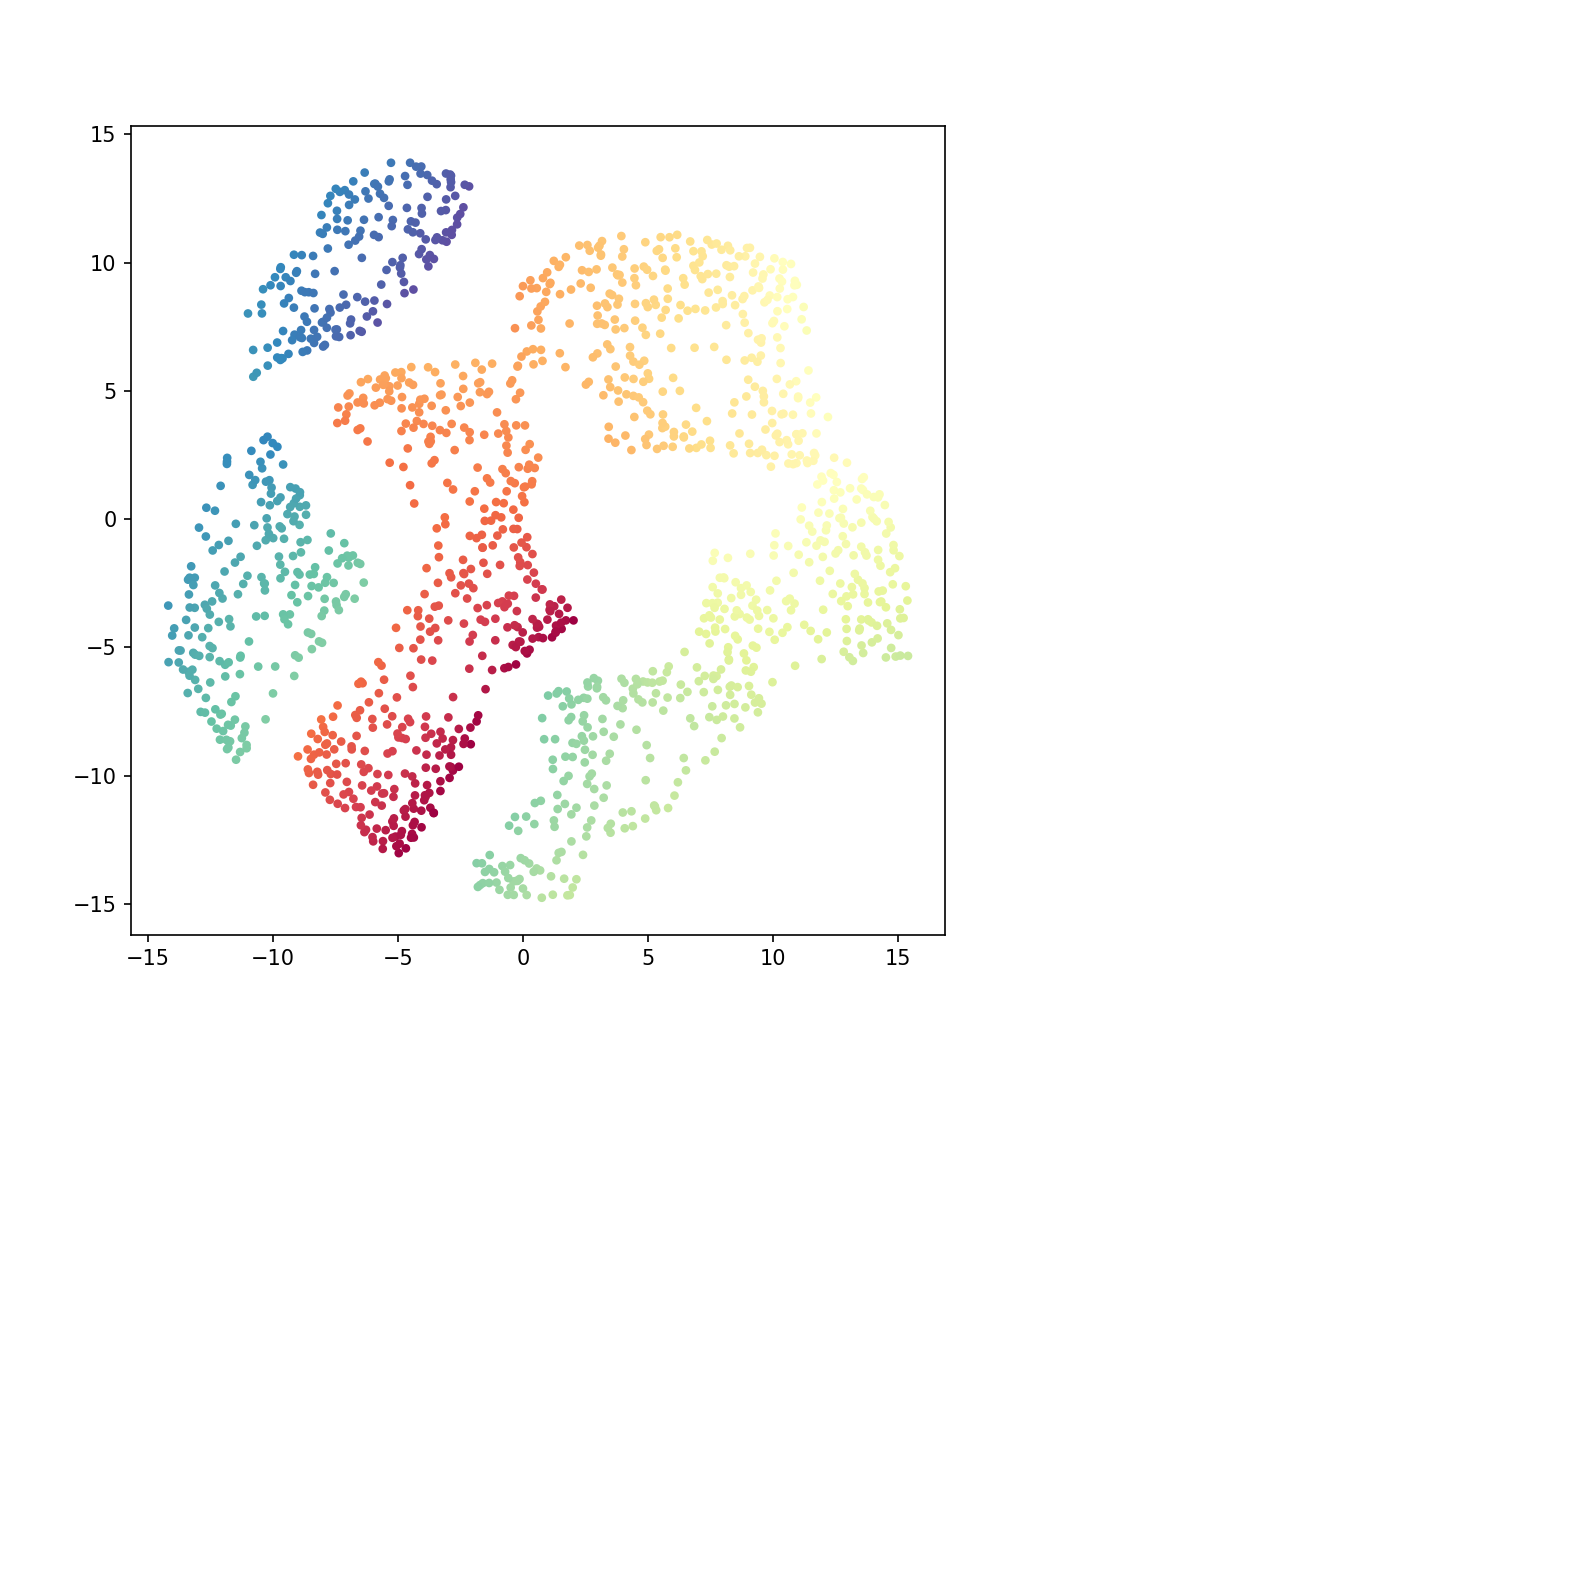

In [16]:
X_tsne = TSNE(n_components=2, perplexity=150).fit_transform(X)
fig1 = plt.figure(figsize=(7, 7), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, marker='o', s=10, cmap=plt.cm.Spectral)

plt.show()

¿Qué está pasando? si observamos los datos orginiales, se observa una cercanía entre los puntos de color rojo y verde, y los puntos de color naranja y azul. Al aumentar el valor de *perplexity*, el algoritmo toma más vecinos cercanos e intenta reproducir esa cercanía en el gráfico 2D, siendo la *perplexity* tan grande que llega a tomar puntos cercanos de la otra parte del *roll* e intenta reproducir esa cercanía.